In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('strokeData.csv')
print("type(df)-->",type(df))

df.head()

type(df)--> <class 'pandas.core.frame.DataFrame'>


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
print("df.shape -->", df.shape)
print("Rows     -->", df.shape[0])
print("Columns  -->", df.shape[1])

df.shape --> (5110, 12)
Rows     --> 5110
Columns  --> 12


In [5]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

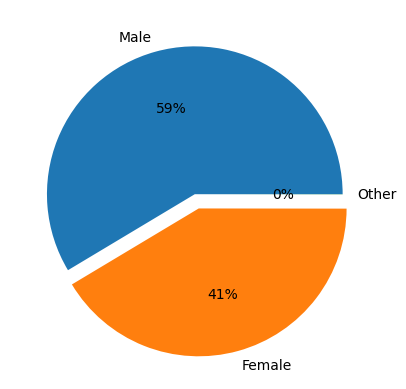

In [6]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn

# declaring data
data = df['gender'].value_counts()
keys = ['Male', 'Female', 'Other']
explode = [0, 0.1, 0]
# plotting data on chart
plt.pie(data, labels=keys,explode=explode,autopct='%.0f%%')

# displaying chart
plt.show()

In [7]:
stroke=[1]
gender=['Male','Female']
peoplesaffected_by_stroke=df.loc[df['stroke'].isin(stroke)]
males=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['gender']==gender[0]])
females=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['gender']==gender[1]])
print('Overall peoples affected by strokes:',len(peoplesaffected_by_stroke))
print('proportion of males:',males)
print('proportion of females:',females)

Overall peoples affected by strokes: 249
proportion of males: 108
proportion of females: 141


In [8]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
smoking_status=['formerly smoked','never smoked','smokes','Unknown']
never_smoked=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[1]])
formerly_smoked=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[0]])
smoked=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[2]])
unknown=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[3]])
print('never_smoked:',never_smoked)
print('formerly_smoked:',formerly_smoked)
print('smoked:',smoked)
print('Unknown:',unknown)

never_smoked: 90
formerly_smoked: 70
smoked: 42
Unknown: 47


In [10]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [11]:
marriage_status=['Yes','No']
married=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['ever_married']==marriage_status[0]])
not_married=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['ever_married']==marriage_status[1]])
print("Married:",married)
print('Not married:',not_married)

Married: 220
Not married: 29


In [12]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [13]:
stroke = df.loc[df['stroke']== 1].reset_index()

stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"]
stroke[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages",
         xTitle='Ages', yTitle='Count')

**Data PreProcessing**

In [14]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.index

RangeIndex(start=0, stop=5110, step=1)

In [16]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
temp_df = df.drop_duplicates()

In [22]:
mean1 = df['bmi'].mean()
print(mean1)
df['bmi'].fillna(mean1)

28.893236911794666


0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [23]:
temp_df = df.drop_duplicates()

In [26]:
temp_df.corr()

ValueError: could not convert string to float: 'Male'